In [26]:
# initial imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [27]:
# Import data
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [28]:
print ("Size of train data : {}" .format(train.shape))
print ("Size of test data : {}" .format(test.shape))

Size of train data : (1460, 81)
Size of test data : (1459, 80)


## EDA

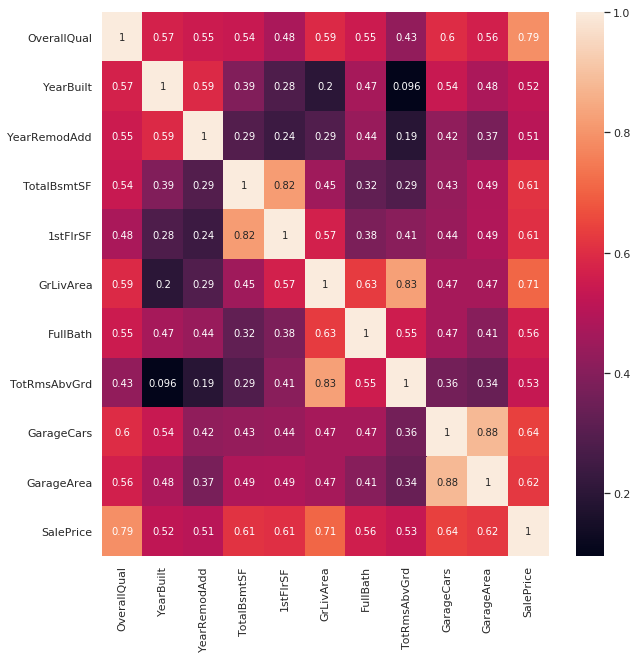

In [29]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True)

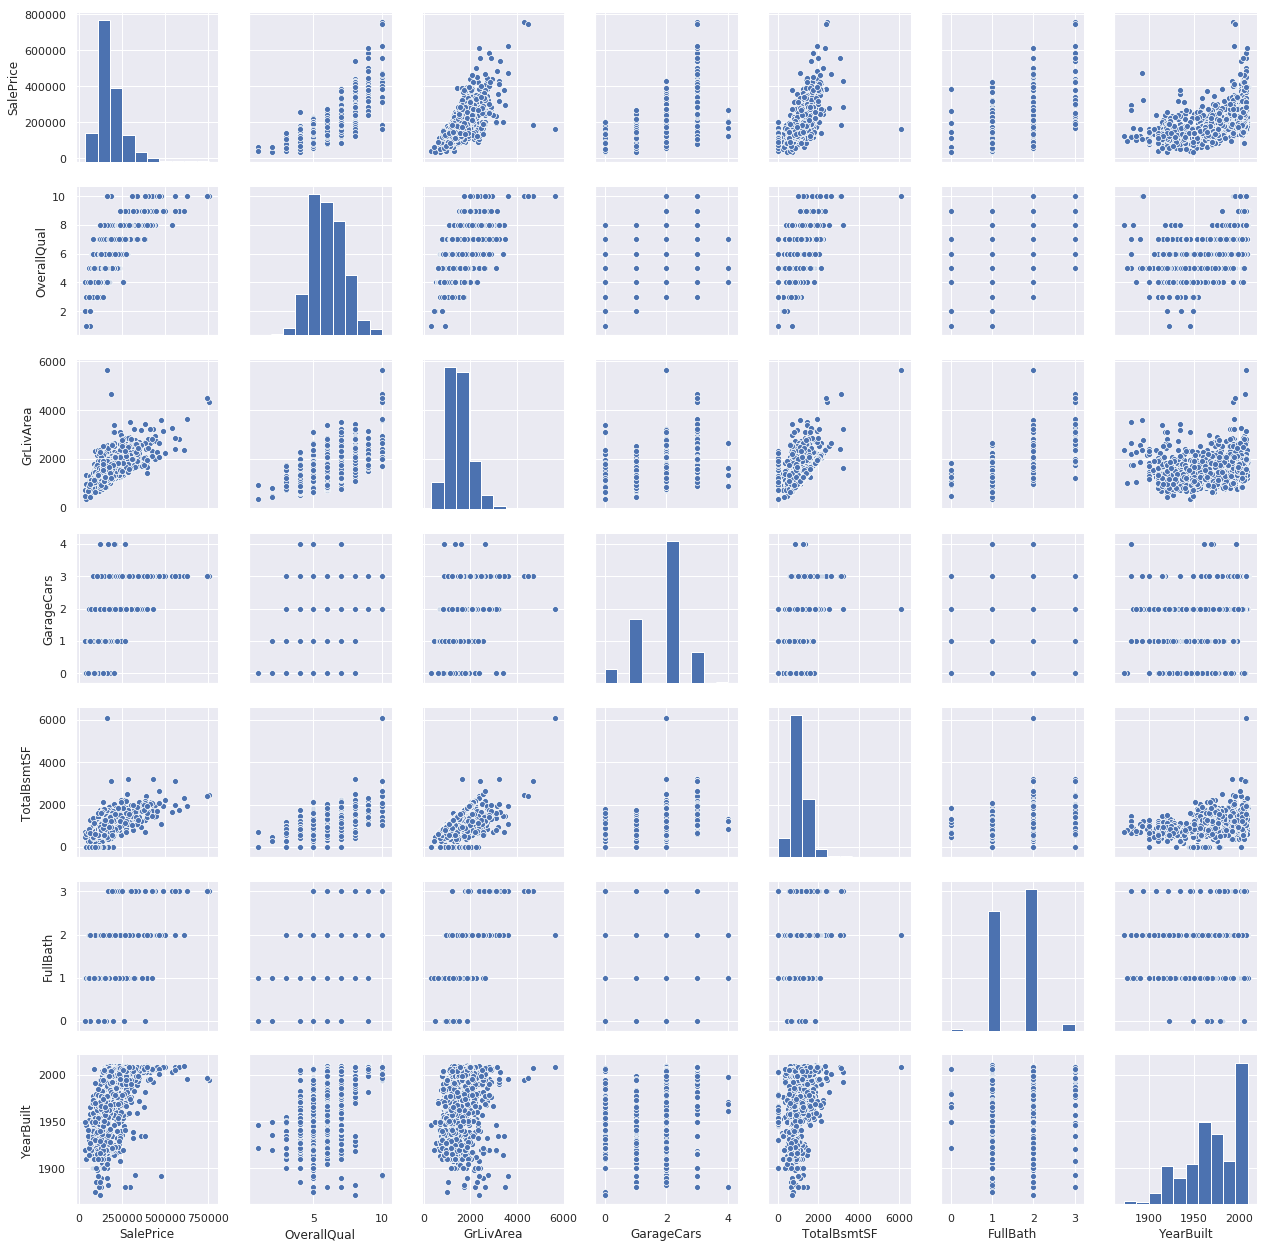

In [30]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

### Removing outliers in terms of GrLivArea and TotalBsmtSF

In [31]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['TotalBsmtSF']>4000)].index)

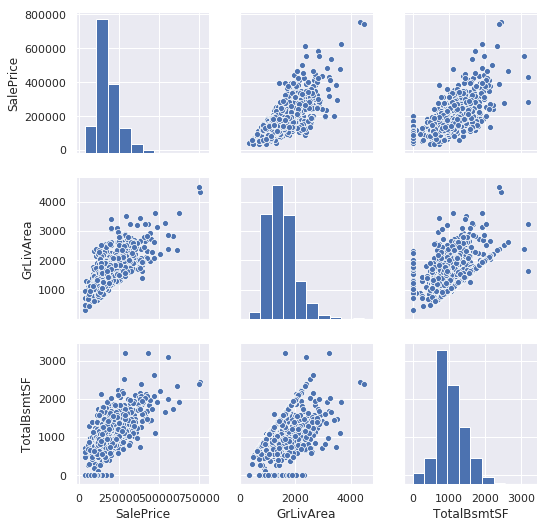

In [32]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'TotalBsmtSF']
sns.pairplot(train[cols], size = 2.5)
plt.show();

## Data Manipulation

In [33]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
print("Concatenated data size is : {}".format(data.shape))

Concatenated data size is : (2917, 80)


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 80 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            198 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2835 non-null object
BsmtExposure     2835 non-null object
BsmtFinSF1       2916 non-null float64
BsmtFinSF2       2916 non-null float64
BsmtFinType1     2838 non-null object
BsmtFinType2     2837 non-null object
BsmtFullBath     2915 non-null float64
BsmtHalfBath     2915 non-null float64
BsmtQual         2836 non-null object
BsmtUnfSF        2916 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2916 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      291

### Missing Values

In [35]:
data.columns[data.isnull().any()]

Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SaleType', 'TotalBsmtSF', 'Utilities'],
      dtype='object')

In [36]:
# Replacing missing value with None for appropiate columns acc to data description
data["PoolQC"] = data["PoolQC"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")
data["Alley"] = data["Alley"].fillna("None")
data["Fence"] = data["Fence"].fillna("None")
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data['MSSubClass'] = data['MSSubClass'].fillna("None")
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    data[col] = data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')
    
# Replacing missing value with 0 for appropiate columns acc to data description
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)
data["LotFrontage"] = data["LotFrontage"].fillna(0)

# Replacing missing value with most common value for appropiate columns acc to data description
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
for col in ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']:
    data[col] = data[col].fillna(data[col].mode()[0])
data["Functional"] = data["Functional"].fillna("Typ")

# Dropping column
data = data.drop(['Utilities'], axis=1)

In [37]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [38]:
# Converting numeric catagorical data to str
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['OverallCond'] = data['OverallCond'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [39]:
cat_data = data.select_dtypes(include=['object']).copy()
cat_data_cols = cat_data.columns

In [40]:
cat_data_cols = list(cat_data_cols)
cat_data_cols.remove('YrSold')
cat_data_cols.remove('MoSold')

In [41]:
data.shape

(2917, 79)

In [42]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

print('Shape all_data: {}'.format(data.shape))

Shape all_data: (2917, 79)


In [132]:
# Creating new feature total SF
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

KeyError: '1stFlrSF'

In [133]:
train = pd.read_csv('../Jing/trainadjusted.csv')
test = pd.read_csv('../Jing/testadjusted.csv')

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice', 'Unnamed: 0'], axis=1, inplace=True)
print("Concatenated data size is : {}".format(data.shape))

#creating matrices for sklearn:
X_train = data[:ntrain]
X_test = data[ntrain:]
X_train.shape

Concatenated data size is : (2917, 80)


(1458, 80)

In [134]:
data.shape

(2917, 80)

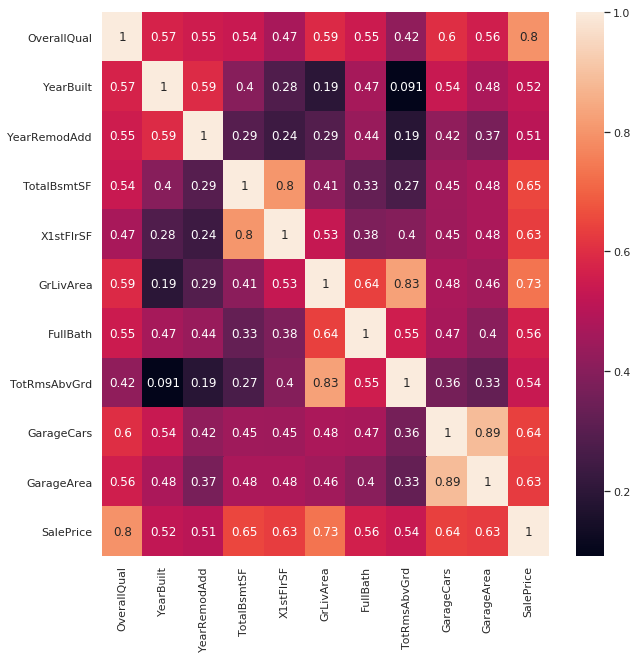

In [135]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True)

### Log transforming data


 mu = 180932.92 and sigma = 79467.79



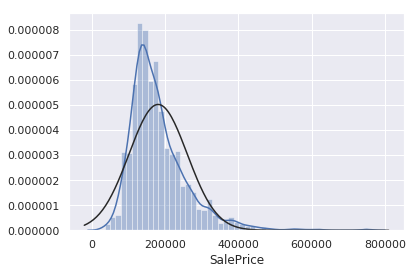

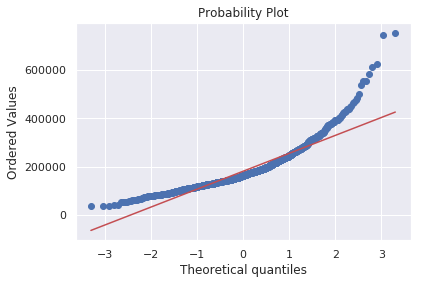

In [136]:
def is_skewed(col):
    sns.distplot(train[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(train[col], plot=plt)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
is_skewed('SalePrice')

In [137]:
# Checking other skewed features
numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
X3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [138]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

# #log transform skewed numeric features:
# numeric_feats = data.dtypes[data.dtypes != "object"].index

# skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
# skewed_feats = skewed_feats[skewed_feats > 0.75]
# skewed_feats = skewed_feats.index

# data[skewed_feats] = np.log1p(data[skewed_feats])

In [139]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    data[feat] = boxcox1p(data[feat], lam)

There are 37 skewed numerical features to Box Cox transform


In [140]:
# cols_corr = list(top_corr_features)
# cols_corr.remove('SalePrice')

In [141]:
# data = data[cols_corr]

In [142]:
data.columns

Index(['Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir',
       'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond',
       'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu',
       'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC',
       'RoofMatl', 'RoofStyle', 'Sale

In [144]:
select_cols = ['OverallQual','Neighborhood','GrLivArea','GarageCars','ExterQual','TotalBsmtSF',
                                 'X1stFlrSF','GarageArea','BsmtFinSF1','X2ndFlrSF','BsmtQual','KitchenQual',
                                 'YearBuilt','FullBath','LotArea']
data = data[select_cols]
data = pd.get_dummies(data)
data.shape

(2917, 49)

In [145]:
data.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,X1stFlrSF,GarageArea,BsmtFinSF1,X2ndFlrSF,YearBuilt,FullBath,...,ExterQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,2.440268,13.698888,1.194318,11.692623,11.692623,10.506271,11.170327,11.686189,14.187527,1.194318,...,0,0,0,1,0,0,0,0,1,0
1,2.259674,12.792276,1.194318,12.792276,12.792276,10.062098,12.062832,0.000000,14.145138,1.194318,...,1,0,0,1,0,0,0,0,0,1
2,2.440268,13.832085,1.194318,11.892039,11.892039,10.775536,10.200343,11.724598,14.184404,1.194318,...,0,0,0,1,0,0,0,0,1,0
3,2.440268,13.711364,1.540963,11.354094,12.013683,10.918253,8.274266,11.354094,14.047529,0.730463,...,1,0,0,0,0,1,0,0,1,0
4,2.602594,14.480029,1.540963,12.510588,12.510588,11.627708,10.971129,12.271365,14.182841,1.194318,...,0,0,0,1,0,0,0,0,1,0


## Creating models

In [146]:
#creating matrices for sklearn:
X_train = data[:ntrain]
X_test = data[ntrain:]
y_train = train.SalePrice.values
X_train.shape

(1458, 49)

In [147]:
X_train.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,X1stFlrSF,GarageArea,BsmtFinSF1,X2ndFlrSF,YearBuilt,FullBath,...,ExterQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,2.440268,13.698888,1.194318,11.692623,11.692623,10.506271,11.170327,11.686189,14.187527,1.194318,...,0,0,0,1,0,0,0,0,1,0
1,2.259674,12.792276,1.194318,12.792276,12.792276,10.062098,12.062832,0.000000,14.145138,1.194318,...,1,0,0,1,0,0,0,0,0,1
2,2.440268,13.832085,1.194318,11.892039,11.892039,10.775536,10.200343,11.724598,14.184404,1.194318,...,0,0,0,1,0,0,0,0,1,0
3,2.440268,13.711364,1.540963,11.354094,12.013683,10.918253,8.274266,11.354094,14.047529,0.730463,...,1,0,0,0,0,1,0,0,1,0
4,2.602594,14.480029,1.540963,12.510588,12.510588,11.627708,10.971129,12.271365,14.182841,1.194318,...,0,0,0,1,0,0,0,0,1,0


### Cross validation

In [148]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def knn_rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [149]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [150]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1323 (0.0060)



In [151]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1326 (0.0067)



In [152]:
lr = LinearRegression()
score = rmsle_cv(lr)
print("LR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LR score: 0.1322 (0.0064)



In [153]:
xgbm = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)
score = rmsle_cv(xgbm)
print("XGB score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

XGB score: 0.1360 (0.0060)



In [154]:
rfm = RandomForestRegressor(random_state = 42)
score = rmsle_cv(rfm)
print("RF score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

RF score: 0.1524 (0.0060)



In [155]:
LassoMd = lasso.fit(X_train.values,y_train)
KRRMd = KRR.fit(X_train.values,y_train)
XgbMd = xgbm.fit(X_train.values,y_train)
RfMd = rfm.fit(X_train.values,y_train)
preds = np.expm1(LassoMd.predict(X_test.values)) + np.expm1(KRRMd.predict(X_test.values))  + np.expm1(RfMd.predict(X_test.values))
preds = preds/3

In [156]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ensemble_sol.csv", index = False)

In [157]:
def get_accuracy(y, y_pred):
    cnt = (y == y_pred).sum()
    return round(cnt/len(y), 2)

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
# from knn import KnnRegression
from invdistweightedknn import KnnRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [159]:
ind = []
for i in range(2, 10):
    for p in range(1, 10):
        ind.append(str(i) + '|' + str(p))

In [160]:
knn_acc = []
knn_acc_2 = []

X_train, X_test, y_train, y_test = train_test_split(data[:ntrain], train.SalePrice.values, test_size=0.3)

# X_cols = ["LotArea", "YearBuilt", "OverallQual"]
# X_train = X_train[X_cols]
# X_test = X_test[X_cols]
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)
for k in range(2, 10):
    knn_acc_1 = []
    for p in range(1, 10):
        clf = KnnRegression(k=k, p=p)
        clf.fit(X_train, y_train)
        knn_pred = []
        for x in X_test:
            pred = clf.predict(x)
            knn_pred.append(pred)
        knn_target_pred = np.array(knn_pred)
        knn_acc.append(sqrt(mean_squared_error(y_test, knn_target_pred)))
        knn_acc_1.append(sqrt(mean_squared_error(y_test, knn_target_pred)))
    knn_acc_2.append(knn_acc_1)

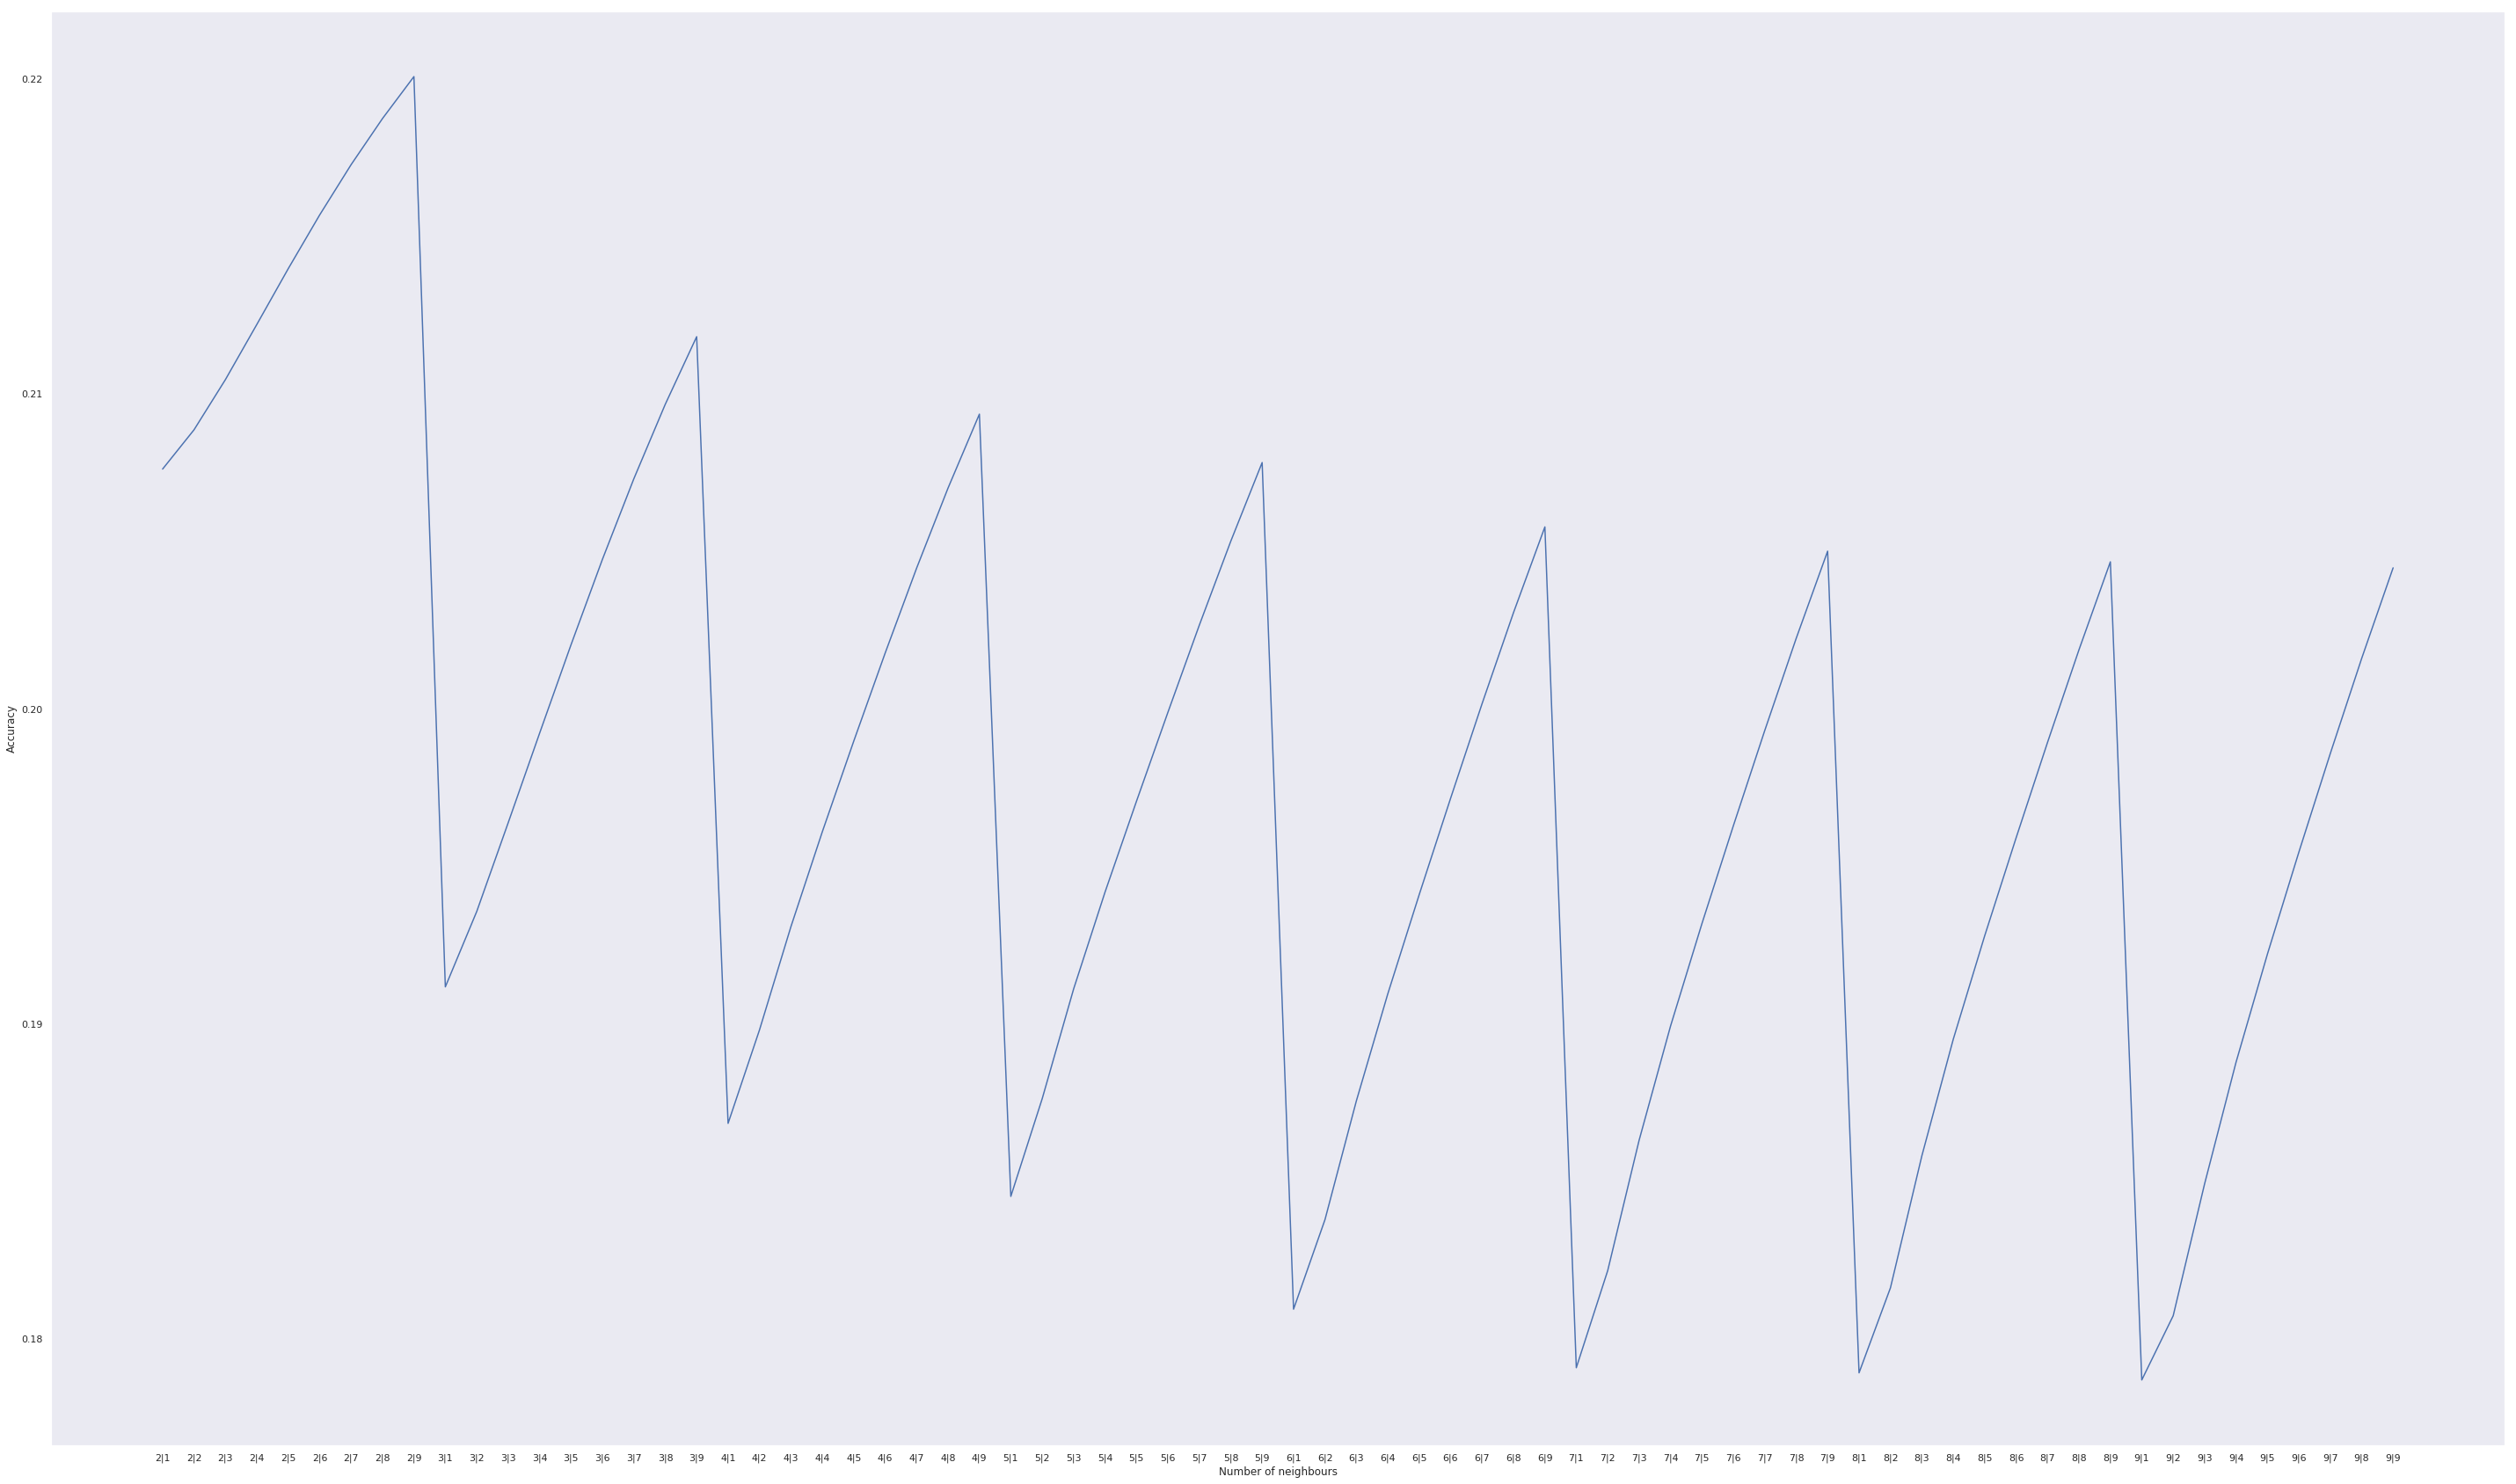

In [161]:
plt.figure(figsize=(50,30))
plt.plot(ind, knn_acc)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

In [176]:
knn_acc.index(min(knn_acc)) + 2

352

In [179]:
knn_acc_2[9]

[0.2079802788477012,
 0.20662380527036903,
 0.20535138360313365,
 0.204263080342575,
 0.20340391590715884,
 0.20277234543797903,
 0.20235801555845273,
 0.20215235001501358,
 0.20214600029223165,
 0.2023261624548515,
 0.2026754385384865,
 0.2031726662537901,
 0.20379503111810235,
 0.20452021788397307,
 0.20532784419142108,
 0.20620007584690225,
 0.20712166502024212,
 0.20807970021450045,
 0.20906327231885127]

In [162]:
X_train, X_test, y_train, y_test = train_test_split(data[:ntrain], train.SalePrice.values, test_size=0.2)

scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

clf = KnnRegression(k=7, p=1)
clf.fit(X_train, y_train)
knn_pred = []
for x in X_test:
    pred = clf.predict(x)
    knn_pred.append(pred)
knn_test_pred = np.array(knn_pred)

print (X_train.shape, y_train.shape, X_test.shape)
print (sqrt(mean_squared_error(y_test, knn_test_pred)))

(1166, 49) (1166,) (292, 49)
0.17847738580194641


In [163]:
clf = KnnRegression(k=8, p=1)
clf.fit(X_train, y_train)
X_test = data[ntrain:]
X_test = scale.fit_transform(X_test)
prd = []
for x in X_test:
    pred = clf.predict(x)
    prd.append(pred)
preds = np.array(prd)

In [164]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":np.expm1(preds)})
solution.to_csv("knninvdistk8p1selectedfeatures.csv", index = False)

In [ ]:
X_train = data[:ntrain]
X_test = data[ntrain:]
y_train = train.SalePrice.values
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)
from sklearn.neighbors import KNeighborsRegressor
m = KNeighborsRegressor(12)
score = knn_rmsle_cv(m)
print("KNN score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
q`1waz`Q1